In [35]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler
from Qommunity.searchers.hierarchical_searcher import HierarchicalSearcher
from Qommunity.iterative_searcher import IterativeSearcher

from dataclasses import dataclass, fields

In [36]:
G = nx.powerlaw_cluster_graph(n=100, m=1, p=0.1)
num_reads = 100
version = ""
region = "na-west-1"

In [37]:
advantage = AdvantageSampler(
    G, num_reads=num_reads, version=version, region=region, use_clique_embedding=True, elapse_times=True, return_sampleset_metadata=True
)

In [38]:
hierarchical_searcher = HierarchicalSearcher(advantage)

In [39]:
res = hierarchical_searcher.hierarchical_community_search(division_tree=True, return_modularities=True, return_sampleset_metadata=True)

In [97]:
communities, division_tree, division_modularities, hierarchical_run_metadata = res

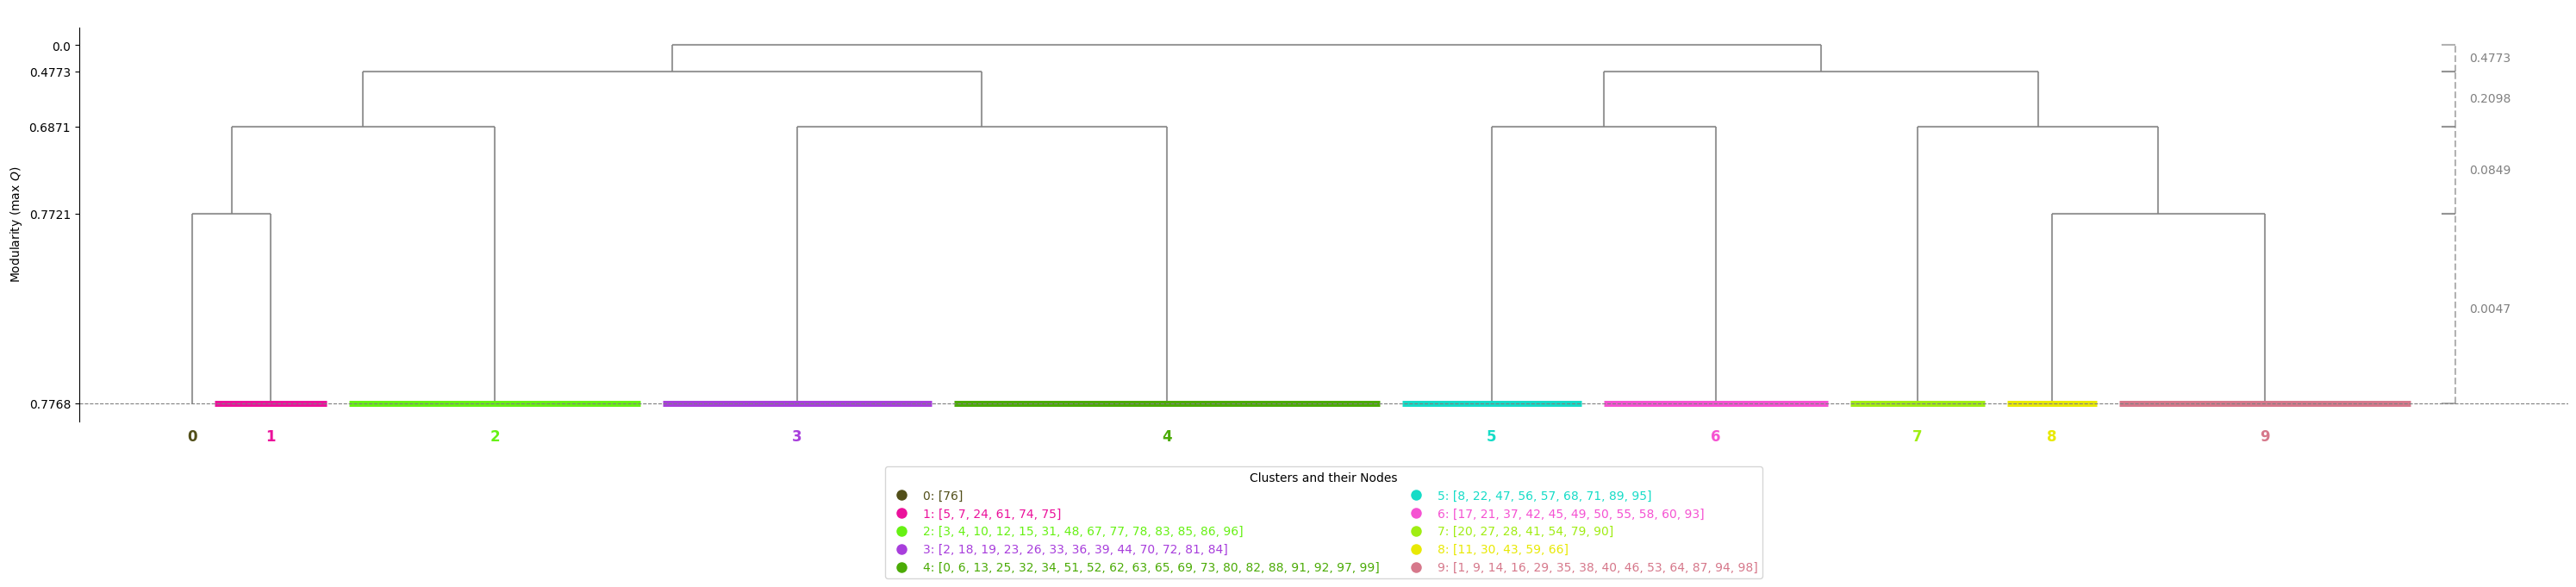

In [54]:
from dendro import Dendrogram


dendro = Dendrogram(G, communities, division_modularities, division_tree)
dendro.draw(yaxis_abs_log=True, figsize=(30, 7), display_leafs=False)

In [44]:
for sublist in division_tree:
    print(sublist)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]
[[0, 2, 3, 4, 5, 6, 7, 10, 12, 13, 15, 18, 19, 23, 24, 25, 26, 31, 32, 33, 34, 36, 39, 44, 48, 51, 52, 61, 62, 63, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 88, 91, 92, 96, 97, 99], [1, 8, 9, 11, 14, 16, 17, 20, 21, 22, 27, 28, 29, 30, 35, 37, 38, 40, 41, 42, 43, 45, 46, 47, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 64, 66, 68, 71, 79, 87, 89, 90, 93, 94, 95, 98]]
[[3, 4, 5, 7, 10, 12, 15, 24, 31, 48, 61, 67, 74, 75, 76, 77, 78, 83, 85, 86, 96], [0, 2, 6, 13, 18, 19, 23, 25, 26, 32, 33, 34, 36, 39, 44, 51, 52, 62, 63, 65, 69, 70, 72, 73, 80, 81, 82, 84, 88, 91, 92, 97, 99]

In [154]:
@dataclass
class DWaveDivisionSamplesetData:
    qpu_sampling_time: float
    qpu_anneal_time_per_sample: float
    qpu_readout_time_per_sample: float
    qpu_access_time: float
    qpu_access_overhead_time: float
    qpu_programming_time: float
    qpu_delay_time_per_sample: float
    post_processing_overhead_time: float
    total_post_processing_time: float


# @dataclass
# class HierarchicalRunData:

print([el.name for el in fields(DWaveDivisionSamplesetData)])

['qpu_sampling_time', 'qpu_anneal_time_per_sample', 'qpu_readout_time_per_sample', 'qpu_access_time', 'qpu_access_overhead_time', 'qpu_programming_time', 'qpu_delay_time_per_sample', 'post_processing_overhead_time', 'total_post_processing_time']


In [99]:
hierarchical_run_metadata

[SamplesetData(dwave_sampleset_metadata=rec.array((24158., 20., 201., 39921.56, 1313.44, 15763.56, 20.58, 119., 119.),
           dtype=[('qpu_sampling_time', '<f8'), ('qpu_anneal_time_per_sample', '<f8'), ('qpu_readout_time_per_sample', '<f8'), ('qpu_access_time', '<f8'), ('qpu_access_overhead_time', '<f8'), ('qpu_programming_time', '<f8'), ('qpu_delay_time_per_sample', '<f8'), ('post_processing_overhead_time', '<f8'), ('total_post_processing_time', '<f8')]), time_measurements=rec.array((0.1650115, 0.0427431, 0.1435244),
           dtype=[('find_clique_embedding_time', '<f8'), ('fixed_embedding_composite_time', '<f8'), ('sample_time', '<f8')])),
 SamplesetData(dwave_sampleset_metadata=rec.array((13876., 20., 98.18, 29636.36, 1166.64, 15760.36, 20.58, 1., 1.),
           dtype=[('qpu_sampling_time', '<f8'), ('qpu_anneal_time_per_sample', '<f8'), ('qpu_readout_time_per_sample', '<f8'), ('qpu_access_time', '<f8'), ('qpu_access_overhead_time', '<f8'), ('qpu_programming_time', '<f8'), ('qp

In [ ]:
# for el in hierarchical_run_metadata[:3]:
#     print(el.dwave_sampleset_metadata)
#     print(el.time_measurements)
#     print()
#     print(el)
#     print()
#     print()

In [253]:
sampleset = hierarchical_run_metadata

In [191]:
sampleset[0].dwave_sampleset_metadata

rec.array((24158., 20., 201., 39921.56, 1313.44, 15763.56, 20.58, 119., 119.),
          dtype=[('qpu_sampling_time', '<f8'), ('qpu_anneal_time_per_sample', '<f8'), ('qpu_readout_time_per_sample', '<f8'), ('qpu_access_time', '<f8'), ('qpu_access_overhead_time', '<f8'), ('qpu_programming_time', '<f8'), ('qpu_delay_time_per_sample', '<f8'), ('post_processing_overhead_time', '<f8'), ('total_post_processing_time', '<f8')])

In [254]:
sampleset[0]

SamplesetData(dwave_sampleset_metadata=rec.array((24158., 20., 201., 39921.56, 1313.44, 15763.56, 20.58, 119., 119.),
          dtype=[('qpu_sampling_time', '<f8'), ('qpu_anneal_time_per_sample', '<f8'), ('qpu_readout_time_per_sample', '<f8'), ('qpu_access_time', '<f8'), ('qpu_access_overhead_time', '<f8'), ('qpu_programming_time', '<f8'), ('qpu_delay_time_per_sample', '<f8'), ('post_processing_overhead_time', '<f8'), ('total_post_processing_time', '<f8')]), time_measurements=rec.array((0.1650115, 0.0427431, 0.1435244),
          dtype=[('find_clique_embedding_time', '<f8'), ('fixed_embedding_composite_time', '<f8'), ('sample_time', '<f8')]))

In [224]:
dtype = [sampleset[0].dwave_sampleset_metadata][
    0
].dtype.descr
dtype

[('qpu_sampling_time', '<f8'),
 ('qpu_anneal_time_per_sample', '<f8'),
 ('qpu_readout_time_per_sample', '<f8'),
 ('qpu_access_time', '<f8'),
 ('qpu_access_overhead_time', '<f8'),
 ('qpu_programming_time', '<f8'),
 ('qpu_delay_time_per_sample', '<f8'),
 ('post_processing_overhead_time', '<f8'),
 ('total_post_processing_time', '<f8')]

In [193]:
def get_hierarchical_run_metadata_field(field_name):
    return np.array([getattr(el, field_name) for el in sampleset])

In [206]:
# def dwave_sampleset_metadata(sampleset: list[SamplesetData]):
#     if len(sampleset) == 0:
#         return []
    
#     first_sample = sampleset[0]
#     if len(first_sample.dwave_sampleset_metadata) == 0:
#         pass
#     ds_meta = first_sample.dwave_sampleset_metadata
#     if isinstance(ds_meta, np.ndarray) and ds_meta.dtype.fields:
#         sampleset_metadata_dtype = ds_meta.dtype
#     elif isinstance(ds_meta, np.ndarray) and ds_meta.shape and hasattr(ds_meta[0], 'dtype'):
#         sampleset_metadata_dtype = ds_meta[0].dtype
#     else:
#         raise TypeError("dwave_sampleset_metadata has unsupported shape or dtype")
    
#     metadata_divisions = [division.dwave_sampleset_metadata for division in sampleset]   

In [225]:
dtype = [sampleset[0].dwave_sampleset_metadata][
    0
].dtype.descr
dtype

hierarchical_run_dwave_data = np.concatenate([np.array([division_rec], dtype=dtype) for division_rec in [division.dwave_sampleset_metadata for division in sampleset]]).view(np.recarray)
hierarchical_run_dwave_data

rec.array([(24158., 20., 201.  , 39921.56, 1313.44, 15763.56, 20.58, 119., 119.),
           (13876., 20.,  98.18, 29636.36, 1166.64, 15760.36, 20.58,   1.,   1.),
           (20410., 20., 163.52, 36171.56, 1110.44, 15761.56, 20.58,   1.,   1.),
           (12456., 20.,  83.98, 28218.76, 1000.24, 15762.76, 20.58,  54.,  54.),
           (12412., 20.,  83.54, 28174.36,  982.64, 15762.36, 20.58,  33.,  33.),
           (17476., 20., 134.18, 33237.56, 1890.44, 15761.56, 20.58,  10.,  10.),
           (20764., 20., 167.06, 36525.96, 1193.04, 15761.96, 20.58,   1.,   1.),
           (14990., 20., 109.32, 30751.16, 1224.84, 15761.16, 20.58,   1.,   1.),
           (20020., 20., 159.62, 35781.96, 1537.04, 15761.96, 20.58,   1.,   1.),
           (13536., 20.,  94.78, 29296.76, 1428.24, 15760.76, 20.58,   1.,   1.),
           (20020., 20., 159.62, 35781.96, 1692.04, 15761.96, 20.58,   1.,   1.),
           (12660., 20.,  86.02, 28421.56, 1334.44, 15761.56, 20.58,   1.,   1.),
           (1499

In [226]:
hierarchical_run_dwave_data.qpu_sampling_time

array([24158., 13876., 20410., 12456., 12412., 17476., 20764., 14990.,
       20020., 13536., 20020., 12660., 14990., 20728., 12456., 19996.,
       12368., 17476.])

In [227]:
hierarchical_run_dwave_data.dtype.descr

[('qpu_sampling_time', '<f8'),
 ('qpu_anneal_time_per_sample', '<f8'),
 ('qpu_readout_time_per_sample', '<f8'),
 ('qpu_access_time', '<f8'),
 ('qpu_access_overhead_time', '<f8'),
 ('qpu_programming_time', '<f8'),
 ('qpu_delay_time_per_sample', '<f8'),
 ('post_processing_overhead_time', '<f8'),
 ('total_post_processing_time', '<f8')]

In [228]:
hierarchical_run_dwave_data.dtype.fields # (dtype('float64'), 8), - byte offsets

mappingproxy({'qpu_sampling_time': (dtype('float64'), 0),
              'qpu_anneal_time_per_sample': (dtype('float64'), 8),
              'qpu_readout_time_per_sample': (dtype('float64'), 16),
              'qpu_access_time': (dtype('float64'), 24),
              'qpu_access_overhead_time': (dtype('float64'), 32),
              'qpu_programming_time': (dtype('float64'), 40),
              'qpu_delay_time_per_sample': (dtype('float64'), 48),
              'post_processing_overhead_time': (dtype('float64'), 56),
              'total_post_processing_time': (dtype('float64'), 64)})

In [229]:
dwave_sampleset_metadata = [DWaveDivisionSamplesetData(*rec) for rec in hierarchical_run_dwave_data]
dwave_sampleset_metadata[:3]

[DWaveDivisionSamplesetData(qpu_sampling_time=24158.0, qpu_anneal_time_per_sample=20.0, qpu_readout_time_per_sample=201.0, qpu_access_time=39921.56, qpu_access_overhead_time=1313.44, qpu_programming_time=15763.56, qpu_delay_time_per_sample=20.58, post_processing_overhead_time=119.0, total_post_processing_time=119.0),
 DWaveDivisionSamplesetData(qpu_sampling_time=13876.0, qpu_anneal_time_per_sample=20.0, qpu_readout_time_per_sample=98.18, qpu_access_time=29636.36, qpu_access_overhead_time=1166.64, qpu_programming_time=15760.36, qpu_delay_time_per_sample=20.58, post_processing_overhead_time=1.0, total_post_processing_time=1.0),
 DWaveDivisionSamplesetData(qpu_sampling_time=20410.0, qpu_anneal_time_per_sample=20.0, qpu_readout_time_per_sample=163.52, qpu_access_time=36171.56, qpu_access_overhead_time=1110.44, qpu_programming_time=15761.56, qpu_delay_time_per_sample=20.58, post_processing_overhead_time=1.0, total_post_processing_time=1.0)]

In [230]:
dtype = [sampleset[0].dwave_sampleset_metadata][
    0
].dtype.descr
dtype
dwave_sampleset_metadata = np.concatenate([np.array([division_rec], dtype=dtype) for division_rec in [division.dwave_sampleset_metadata for division in sampleset]]).view(np.recarray)

dtype = [sampleset[0].time_measurements][
    0
].dtype.descr
time_measurements = np.concatenate([np.array([division_rec], dtype=dtype) for division_rec in [division.time_measurements for division in sampleset]]).view(np.recarray)

In [223]:
field_name = "dwave_sampleset_metadata"
field_name = "time_measurements"
dtype = [getattr(sampleset[0], field_name)][
    0
].dtype.descr
time_measurements = np.concatenate([np.array([division_rec], dtype=dtype) for division_rec in [getattr(division, field_name) for division in sampleset]]).view(np.recarray)
time_measurements

rec.array([(0.1650115, 0.0427431, 0.1435244),
           (0.5105884, 0.0764313, 0.0918525),
           (0.2211836, 0.0262553, 0.0344791),
           (0.2400698, 0.0602659, 0.037003 ),
           (0.2634495, 0.031921 , 0.0293465),
           (0.2940883, 0.032091 , 0.025622 ),
           (0.2144477, 0.022862 , 0.0304249),
           (0.2099886, 0.0296967, 0.0258025),
           (0.1662548, 0.0190647, 0.0243525),
           (0.2720786, 0.0420341, 0.0527868),
           (0.3528002, 0.0244463, 0.0389472),
           (0.2385062, 0.0278534, 0.0371874),
           (0.3567644, 0.0404454, 0.0754939),
           (0.2464375, 0.0307766, 0.0343958),
           (0.1980467, 0.0246584, 0.0201245),
           (0.1682466, 0.0206147, 0.022172 ),
           (0.2144141, 0.0481991, 0.0314137),
           (0.1864318, 0.024036 , 0.0237286)],
          dtype=[('find_clique_embedding_time', '<f8'), ('fixed_embedding_composite_time', '<f8'), ('sample_time', '<f8')])

In [212]:
from QHyper.solvers.base import SamplesetData


@dataclass
class HierarchicalRunSamplesetMetadata:
    dwave_sampleset_metadata: np.ndarray
    time_measurements: np.ndarray

In [184]:
sampleset

[SamplesetData(dwave_sampleset_metadata=rec.array((24158., 20., 201., 39921.56, 1313.44, 15763.56, 20.58, 119., 119.),
           dtype=[('qpu_sampling_time', '<f8'), ('qpu_anneal_time_per_sample', '<f8'), ('qpu_readout_time_per_sample', '<f8'), ('qpu_access_time', '<f8'), ('qpu_access_overhead_time', '<f8'), ('qpu_programming_time', '<f8'), ('qpu_delay_time_per_sample', '<f8'), ('post_processing_overhead_time', '<f8'), ('total_post_processing_time', '<f8')]), time_measurements=rec.array((0.1650115, 0.0427431, 0.1435244),
           dtype=[('find_clique_embedding_time', '<f8'), ('fixed_embedding_composite_time', '<f8'), ('sample_time', '<f8')])),
 SamplesetData(dwave_sampleset_metadata=rec.array((13876., 20., 98.18, 29636.36, 1166.64, 15760.36, 20.58, 1., 1.),
           dtype=[('qpu_sampling_time', '<f8'), ('qpu_anneal_time_per_sample', '<f8'), ('qpu_readout_time_per_sample', '<f8'), ('qpu_access_time', '<f8'), ('qpu_access_overhead_time', '<f8'), ('qpu_programming_time', '<f8'), ('qp

In [255]:
hierarchical_run_dwave_data

rec.array([(24158., 20., 201.  , 39921.56, 1313.44, 15763.56, 20.58, 119., 119.),
           (13876., 20.,  98.18, 29636.36, 1166.64, 15760.36, 20.58,   1.,   1.),
           (20410., 20., 163.52, 36171.56, 1110.44, 15761.56, 20.58,   1.,   1.),
           (12456., 20.,  83.98, 28218.76, 1000.24, 15762.76, 20.58,  54.,  54.),
           (12412., 20.,  83.54, 28174.36,  982.64, 15762.36, 20.58,  33.,  33.),
           (17476., 20., 134.18, 33237.56, 1890.44, 15761.56, 20.58,  10.,  10.),
           (20764., 20., 167.06, 36525.96, 1193.04, 15761.96, 20.58,   1.,   1.),
           (14990., 20., 109.32, 30751.16, 1224.84, 15761.16, 20.58,   1.,   1.),
           (20020., 20., 159.62, 35781.96, 1537.04, 15761.96, 20.58,   1.,   1.),
           (13536., 20.,  94.78, 29296.76, 1428.24, 15760.76, 20.58,   1.,   1.),
           (20020., 20., 159.62, 35781.96, 1692.04, 15761.96, 20.58,   1.,   1.),
           (12660., 20.,  86.02, 28421.56, 1334.44, 15761.56, 20.58,   1.,   1.),
           (1499

In [252]:
# def get_hierarchical_run_dwave_data(sampleset: list[SamplesetData]) -> np.recarray:
#     if len(sampleset) == 0:
#         raise ValueError("Sampleset is empty")

#     # Assuming all samplesets have the same dtype for dwave_sampleset_metadata
#     if not hasattr(sampleset[0], 'dwave_sampleset_metadata'):
#         raise ValueError("Sampleset does not contain 'dwave_sampleset_metadata' attribute")

#     # Get the dtype
#     dtype = [sampleset[0].dwave_sampleset_metadata][
#             0
#     ].dtype.descr

#     hierarchical_run_dwave_data = np.concatenate([np.array([division_rec], dtype=dtype) for division_rec in [division.dwave_sampleset_metadata for division in sampleset]]).view(np.recarray)
#     return hierarchical_run_dwave_data

from enum import Enum
from dataclasses import dataclass, field


class FieldName(Enum):
    DwaveSamplesetMetadata = "dwave_sampleset_metadata"
    TimeMeasurements = "time_measurements"


@dataclass
class HierarchicalRunSamplesetMetadata:
    dwave_sampleset_metadata: np.recarray = field(init=False)
    time_measurements: np.recarray = field(init=False)


    def __init__(self, sampleset: list[SamplesetData]):
        self.dwave_sampleset_metadata = self._process_samples(sampleset, FieldName.DwaveSamplesetMetadata.value)
        self.time_measurements = self._process_samples(sampleset, FieldName.TimeMeasurements.value)


    def _process_samples(self, sampleset: list[SamplesetData], field_name: FieldName) -> np.recarray:
        dtype = [getattr(sampleset[0], field_name)][
            0
        ].dtype.descr
        concatenated = np.concatenate([np.array([division_rec], dtype=dtype) for division_rec in [getattr(division, field_name) for division in sampleset]]).view(np.recarray)
        return concatenated
    

In [251]:
HierarchicalRunSamplesetMetadata(sampleset).dwave_sampleset_metadata.qpu_sampling_time.sum()

300792.0

In [249]:
@dataclass
class HierarchicalSearchResults:
    communities: list
    division_modularities: list
    division_tree: list
    sampleset_metadata: dict

In [ ]:
dwave_sampleset_metadata.qpu_sampling_time

array([24068., 13852., 20818., 20296., 20296., 19996.,  8254.,  8254.,
       12368., 19816., 12676., 12412., 12412., 12500., 12412., 13784.,
       20728., 12660., 17476., 12500., 12500., 20818., 14990., 17248.,
       12412., 12500.])

In [ ]:
time_measurements.find_clique_embedding_time.sum()

4.3341346999877715

In [ ]:
def process_results(sampleset):
    dtype = [sampleset[0].dwave_sampleset_metadata][
        0
    ].dtype.descr
    dtype
    dwave_sampleset_metadata = np.array(
        [
            np.concatenate(
                [
                    np.array([r], dtype=dtype)
                    for r in [
                        si.dwave_sampleset_info
                        for si in sampleset[run].samplesets_data
                    ]
                ]
            ).view(np.recarray)
            for run in range(len(sampleset))
        ],
        dtype=object,
    )

    dtype = [si.time_measurements for si in sampleset[0].samplesets_data][
        0
    ].dtype.descr
    time_measurements = np.array(
        [
            np.concatenate(
                [
                    np.array([r], dtype=dtype)
                    for r in [
                        si.time_measurements
                        for si in sampleset[run].samplesets_data
                    ]
                ]
            ).view(np.recarray)
            for run in range(len(sampleset))
        ],
        dtype=object,
    )

    results_procesed_dtypes = sampleset.dtype.descr
    results_procesed_dtypes.pop()
    results_procesed_dtypes.append(("dwave_sampleset_metadata", object))
    results_procesed_dtypes.append(("time_measurements", object))
    results_procesed_dtypes

    results_processed_componenets = [
        sampleset.communities,
        sampleset.modularity,
        sampleset.time,
        sampleset.division_tree,
        sampleset.division_modularities,
        dwave_sampleset_metadata,
        time_measurements,
    ]

    results_processed = np.rec.fromarrays(
        results_processed_componenets,
        dtype=results_procesed_dtypes,
    )

    return results_processed

In [16]:
processed = process_results(res)

AttributeError: 'list' object has no attribute 'samplesets_data'